<a href="https://colab.research.google.com/github/Div-ex/DSP_Mini_Project/blob/main/DSPminiproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
placement_data = pd.read_csv("/content/drive/MyDrive/Placement_Data_Full_Class.csv")
# print(iris[['Gender']])
print(placement_data.iloc[0:1,0:])

   Sno Gender  10th % SSC Board  12th % HSC Board 12th Stream  Degree %  \
0    1      M    67.0    Others    91.0    Others    Commerce      58.0   

  Degree stream Work exp specialisation  Mba %  status    salary  
0      Sci&Tech       No         Mkt&HR   58.8  Placed  270000.0  


**Data Transformation**<hr>
Gender: M = 1, F = 2<br>
SSC : Central = 1, Others = 2<br>
HSC : Central = 1, Others = 2<br>
12th Stream : Science = 1, Commerce = 2, Arts = 3<br>
Degree stream : Sci&Tech = 1, Comm&Mgmt = 2, Others = 3<br>
Work exp : Yes = 1, No = 2<br>
Status : Placed = 1, Not Placed = 2

In [ ]:
placement_data['Gender'].replace('M', 1, inplace=True)
placement_data['Gender'].replace('F', 2, inplace=True)

placement_data['SSC Board'].replace('Central', 1, inplace=True)
placement_data['SSC Board'].replace('Others', 2, inplace=True)

placement_data['HSC Board'].replace('Central', 1, inplace=True)
placement_data['HSC Board'].replace('Others', 2, inplace=True)

placement_data['12th Stream'].replace('Science', 1, inplace=True)
placement_data['12th Stream'].replace('Commerce', 2, inplace=True)
placement_data['12th Stream'].replace('Arts', 3, inplace=True)

placement_data['Degree stream'].replace('Sci&Tech', 1, inplace=True)
placement_data['Degree stream'].replace('Comm&Mgmt', 2, inplace=True)
placement_data['Degree stream'].replace('Others', 3, inplace=True)

placement_data['Work exp'].replace('Yes', 1, inplace=True)
placement_data['Work exp'].replace('No', 2, inplace=True)

placement_data['status'].replace(2, 'Not Placed', inplace=True)


print(placement_data['Degree stream'].unique())
placement_data

[1 2 3]


,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,1,67.00,2,91.00,2,2,58.00,1,2,Mkt&HR,58.80,Placed,270000.0
1,2,1,79.33,1,78.33,2,1,77.48,1,1,Mkt&Fin,66.28,Placed,200000.0
2,3,1,65.00,1,68.00,1,3,64.00,2,2,Mkt&Fin,57.80,Placed,250000.0
3,4,1,56.00,1,52.00,1,1,52.00,1,2,Mkt&HR,59.43,Not Placed,NaN
4,5,1,85.80,1,73.60,1,2,73.30,2,2,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,2,82.00,2,2,77.60,2,2,Mkt&Fin,74.49,Placed,400000.0
211,212,1,58.00,2,60.00,2,1,72.00,1,2,Mkt&Fin,53.62,Placed,275000.0
212,213,1,67.00,2,67.00,2,2,73.00,2,1,Mkt&Fin,69.72,Placed,295000.0
213,214,2,74.00,2,66.00,2,2,58.00,2,2,Mkt&HR,60.23,Placed,204000.0


**Test-Train Split**

In [ ]:
X = placement_data[['Gender','10th %', 'SSC Board', '12th %', 'HSC Board','12th Stream','Degree %','Degree stream','Work exp']]
Y = placement_data[['status']]
placement_data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50, shuffle = False,)

**Model Creation**

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, Y_train)

<ipython-input-102-904c9c9a2449>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


RandomForestClassifier()

In [ ]:
print(clf.feature_importances_)

[0.04187328 0.34045713 0.02301905 0.23673764 0.01659025 0.02627532
 0.23608104 0.03263848 0.04632781]


**Model Testing**

In [ ]:
Y_pred = clf.predict(X_test)
Y_pred

array(['Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Not Placed', 'Not Placed', 'Not Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Placed', 'Not Placed', 'Not Placed', 'Not Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Not Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed',

In [ ]:
Y_test

,status
107,Placed
108,Placed
109,Not Placed
110,Placed
111,Not Placed
...,...
210,Placed
211,Placed
212,Placed
213,Placed


In [ ]:
Results = []
Y_pred.tolist()
print(Y_pred)
Y_testlist = Y_test.values.tolist()
print(Y_testlist)
for i in range(0, 108):
  n1 = (Y_pred[i] ==  Y_testlist[i][0])
  Results.append(n1)

Results

In [ ]:
tr = 0
fl = 0
for r in Results:
  if r == True:
    tr = tr + 1
  elif r == False:
    fl = fl + 1
tr,fl

(64, 44)

In [ ]:
Y_test

,status
200,Placed
212,Placed
138,Placed
176,Placed
15,Placed
...,...
119,Placed
33,Placed
11,Placed
209,Placed


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, pos_label = 'Placed')
recall = recall_score(Y_test, Y_pred, pos_label = 'Placed')
f1 = f1_score(Y_test, Y_pred, pos_label = 'Placed')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.5925925925925926
Precision: 0.7012987012987013
Recall: 0.72
F1-Score: 0.7105263157894737


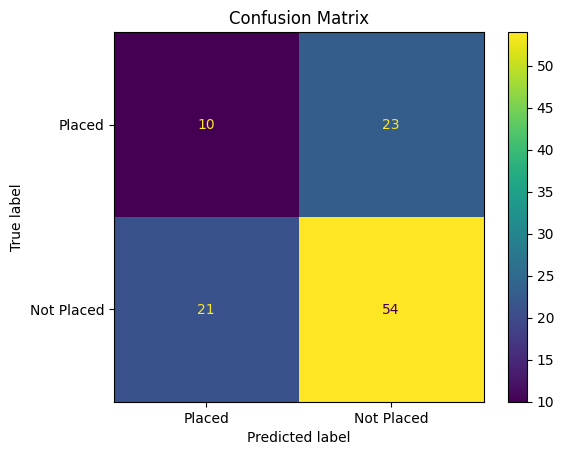

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Placed', 'Not Placed'])
disp.plot()
disp.ax_.set(title='Confusion Matrix')
plt.show()